In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as snb
from scipy import stats as st

In [8]:
# Returns wether PC os is linux or other
def isLinux():
    return os.name == 'posix'


In [9]:
biosense_readings_path = ''
emstast_readings_path = ''

if isLinux():
    pass
else:
    biosense_readings_path = 'C:\\Users\\pveso\\Downloads\\Biosense_Validation\\Commertial_Electrodes_Biosense\\'
    emstast_readings_path = 'C:\\Users\\pveso\\Downloads\\Biosense_Validation\\Commertial_Electrodes_Emstat_Blue\\Readings\\'

In [10]:
# reading all csv files
readings_list = sorted(os.listdir(biosense_readings_path))
df_list_rhodamine = []
df_list_virgin = []
if (len(readings_list) > 0):
    for i in range(len(readings_list)):
        file = readings_list[i]
        df = pd.read_csv(biosense_readings_path + file)
        if ('data_R' in file):
            df_list_rhodamine.append(df)
        else:
            df_list_virgin.append(df)

    print(f'reading pandas df successifully\nRhodamine:{len(df_list_rhodamine)}\nVirgin:{len(df_list_virgin)}')
else:
    print('There is no file in the path')     

reading pandas df successifully
Rhodamine:25
Virgin:25


In [11]:
# Joining all pandas files into groups with rhodamine and no-rhodamin
biosense_rhodamine = pd.concat(df_list_rhodamine, axis=1)
biosense_virgin = pd.concat(df_list_virgin, axis=1)

In [12]:
potential_rhodamine = biosense_rhodamine.iloc[:,0]
currents_rhodamine = biosense_rhodamine.iloc[:,1::2]
potential_virgin = biosense_virgin.iloc[:,0]
currents_virgin = biosense_virgin.iloc[:,1::2]

In [13]:
currents_rhodamine.head()

,current,current,current,current,current,current,current,current,current,current,...,current,current,current,current,current,current,current,current,current,current
0,-0.000082,-0.000067,-0.000060,-0.000053,-0.000057,-0.000084,-0.000069,-0.000055,-0.000046,-0.000048,...,-0.000078,-0.000065,-0.000058,-0.000064,-0.000060,-0.000070,-0.000065,-0.000061,-0.000052,-0.000050
1,-0.000081,-0.000066,-0.000059,-0.000052,-0.000056,-0.000083,-0.000068,-0.000053,-0.000044,-0.000046,...,-0.000077,-0.000064,-0.000057,-0.000063,-0.000059,-0.000069,-0.000064,-0.000060,-0.000051,-0.000049
2,-0.000080,-0.000065,-0.000057,-0.000050,-0.000054,-0.000082,-0.000067,-0.000052,-0.000043,-0.000045,...,-0.000076,-0.000063,-0.000056,-0.000061,-0.000057,-0.000069,-0.000063,-0.000059,-0.000050,-0.000049
3,-0.000079,-0.000064,-0.000057,-0.000050,-0.000053,-0.000081,-0.000066,-0.000051,-0.000042,-0.000044,...,-0.000076,-0.000062,-0.000055,-0.000060,-0.000056,-0.000068,-0.000062,-0.000058,-0.000050,-0.000048
4,-0.000078,-0.000063,-0.000056,-0.000049,-0.000053,-0.000080,-0.000064,-0.000050,-0.000041,-0.000043,...,-0.000075,-0.000061,-0.000054,-0.000059,-0.000055,-0.000067,-0.000061,-0.000057,-0.000049,-0.000047


In [14]:
currents_virgin.head()

,current,current,current,current,current,current,current,current,current,current,...,current,current,current,current,current,current,current,current,current,current
0,-0.000059,-0.000046,-0.000049,-0.000042,-0.000043,-0.000058,-0.000046,-0.000045,-0.000044,-0.000048,...,-0.000059,-0.000043,-0.000045,-0.000041,-0.000040,-0.000059,-0.000041,-0.000041,-0.000040,-0.000046
1,-0.000058,-0.000046,-0.000049,-0.000042,-0.000042,-0.000058,-0.000046,-0.000045,-0.000043,-0.000048,...,-0.000058,-0.000043,-0.000045,-0.000041,-0.000040,-0.000058,-0.000041,-0.000041,-0.000039,-0.000046
2,-0.000058,-0.000046,-0.000049,-0.000042,-0.000042,-0.000058,-0.000045,-0.000045,-0.000043,-0.000048,...,-0.000058,-0.000043,-0.000045,-0.000041,-0.000040,-0.000058,-0.000041,-0.000041,-0.000039,-0.000046
3,-0.000058,-0.000045,-0.000049,-0.000041,-0.000042,-0.000057,-0.000045,-0.000045,-0.000043,-0.000048,...,-0.000058,-0.000043,-0.000045,-0.000040,-0.000039,-0.000058,-0.000041,-0.000041,-0.000039,-0.000045
4,-0.000058,-0.000045,-0.000049,-0.000041,-0.000042,-0.000057,-0.000045,-0.000044,-0.000043,-0.000048,...,-0.000058,-0.000043,-0.000045,-0.000040,-0.000039,-0.000057,-0.000041,-0.000040,-0.000039,-0.000045


In [15]:
currents_rhodamine.describe()

,current,current,current,current,current,current,current,current,current,current,...,current,current,current,current,current,current,current,current,current,current
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,...,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,-0.000004,0.000002,0.000004,0.000004,0.000003,-0.000004,0.000001,0.000004,0.000004,0.000005,...,-0.000004,0.000002,0.000004,0.000003,0.000003,-0.000003,0.000001,0.000003,0.000004,0.000003
std,0.000087,0.000090,0.000091,0.000092,0.000093,0.000087,0.000091,0.000093,0.000094,0.000094,...,0.000087,0.000089,0.000091,0.000092,0.000093,0.000084,0.000086,0.000087,0.000088,0.000088
min,-0.000198,-0.000199,-0.000201,-0.000203,-0.000205,-0.000196,-0.000200,-0.000204,-0.000206,-0.000208,...,-0.000194,-0.000195,-0.000197,-0.000202,-0.000205,-0.000191,-0.000191,-0.000192,-0.000194,-0.000195
25%,-0.000068,-0.000069,-0.000070,-0.000071,-0.000072,-0.000070,-0.000072,-0.000073,-0.000074,-0.000074,...,-0.000069,-0.000070,-0.000071,-0.000073,-0.000075,-0.000062,-0.000063,-0.000064,-0.000066,-0.000067
50%,-0.000024,-0.000015,-0.000012,-0.000010,-0.000009,-0.000024,-0.000015,-0.000011,-0.000009,-0.000008,...,-0.000022,-0.000014,-0.000011,-0.000010,-0.000009,-0.000025,-0.000019,-0.000015,-0.000014,-0.000013
75%,0.000056,0.000062,0.000065,0.000067,0.000067,0.000055,0.000062,0.000064,0.000074,0.000073,...,0.000056,0.000062,0.000064,0.000066,0.000066,0.000055,0.000059,0.000062,0.000062,0.000062
max,0.000191,0.000200,0.000205,0.000207,0.000208,0.000188,0.000201,0.000207,0.000210,0.000213,...,0.000187,0.000197,0.000201,0.000203,0.000207,0.000185,0.000192,0.000196,0.000197,0.000198


In [16]:
currents_virgin.describe()

,current,current,current,current,current,current,current,current,current,current,...,current,current,current,current,current,current,current,current,current,current
count,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1.115000e+03,1115.000000,1115.000000,1115.000000,1115.000000,...,1.115000e+03,1115.000000,1115.000000,1115.000000,1115.000000,1.115000e+03,1115.000000,1115.000000,1115.000000,1115.000000
mean,-0.000001,0.000003,0.000002,0.000003,0.000003,-9.723480e-07,0.000003,0.000003,0.000003,0.000002,...,-8.491157e-07,0.000003,0.000003,0.000004,0.000003,-6.890610e-07,0.000003,0.000003,0.000003,0.000003
std,0.000076,0.000076,0.000076,0.000076,0.000076,7.646655e-05,0.000077,0.000077,0.000077,0.000077,...,7.775412e-05,0.000078,0.000078,0.000077,0.000077,7.747901e-05,0.000077,0.000077,0.000077,0.000077
min,-0.000148,-0.000143,-0.000144,-0.000143,-0.000142,-1.521000e-04,-0.000151,-0.000152,-0.000152,-0.000153,...,-1.577000e-04,-0.000156,-0.000155,-0.000154,-0.000153,-1.539000e-04,-0.000152,-0.000150,-0.000149,-0.000148
25%,-0.000055,-0.000052,-0.000053,-0.000053,-0.000053,-5.507500e-05,-0.000051,-0.000052,-0.000052,-0.000052,...,-5.548000e-05,-0.000052,-0.000052,-0.000052,-0.000052,-5.559500e-05,-0.000053,-0.000052,-0.000052,-0.000053
50%,-0.000018,-0.000014,-0.000015,-0.000014,-0.000014,-1.495000e-05,-0.000013,-0.000014,-0.000014,-0.000015,...,-1.406000e-05,-0.000012,-0.000012,-0.000011,-0.000012,-1.417000e-05,-0.000013,-0.000012,-0.000012,-0.000012
75%,0.000054,0.000058,0.000057,0.000058,0.000058,5.356500e-05,0.000057,0.000057,0.000057,0.000057,...,5.437500e-05,0.000057,0.000058,0.000058,0.000057,5.470500e-05,0.000057,0.000058,0.000057,0.000057
max,0.000154,0.000157,0.000157,0.000157,0.000157,1.599000e-04,0.000165,0.000165,0.000166,0.000166,...,1.626000e-04,0.000167,0.000168,0.000167,0.000166,1.613000e-04,0.000165,0.000166,0.000164,0.000163


Text(0, 0.5, 'Current (uA)')

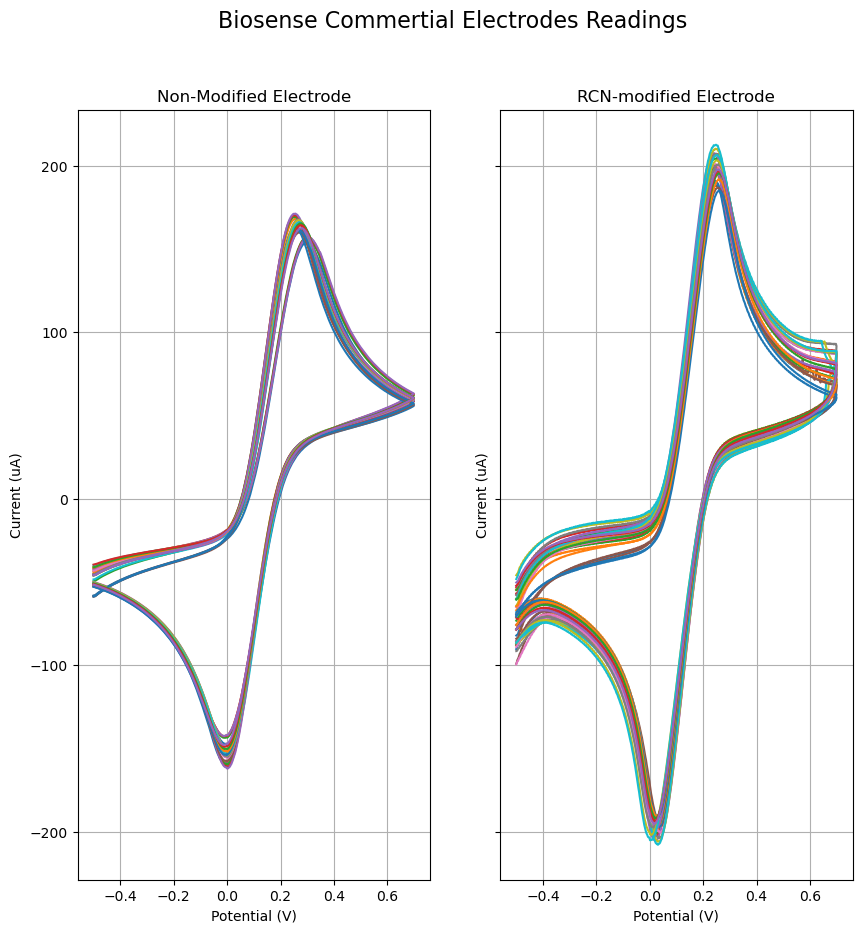

In [17]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(10,10), sharex=True, sharey=True)
fig.suptitle('Biosense Commertial Electrodes Readings', fontsize=16)
for i in range(currents_virgin.shape[1]):
    ax0.plot(potential_virgin, currents_virgin.iloc[:,i].values * 1000000)
    
for i in range(currents_rhodamine.shape[1]):
    ax1.plot(potential_rhodamine, currents_rhodamine.iloc[:,i].values * 1000000)

ax0.grid()
ax1.grid()
ax0.title.set_text('Non-Modified Electrode')
ax1.title.set_text('RCN-modified Electrode')
# Set common labels
ax0.set_xlabel('Potential (V)')
ax0.set_ylabel('Current (uA)')
ax1.set_xlabel('Potential (V)')
ax1.set_ylabel('Current (uA)')


In [18]:
plt.show()

In [19]:
rhodamine_descriptive_df = currents_rhodamine.describe()
virgin_descriptive_df = currents_virgin.describe()

In [20]:
rhodamine_descriptive_df.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [21]:
# Pegando os Valores de corrente máximo e Mínimos
max_rhodamine_current_values = rhodamine_descriptive_df.iloc[-1,:].values * 1000000
min_rhodamine_current_values = rhodamine_descriptive_df.iloc[3,:].values * 1000000
max_virgin_current_values = virgin_descriptive_df.iloc[-1, :].values * 1000000
min_virgin_current_values = virgin_descriptive_df.iloc[3, :].values * 1000000


In [22]:
article = True
if article:
    label_rodamina = "Modificado"
    label_n_modificado = "Não Modificado"
    corrente = 'Corrente (uA)'
else:
    label_rodamina = "RCN-Electrode"
    label_n_modificado = "Non-Modified"
    corrente = 'Current (uA)'

Text(0.5, 0, 'Corrente (uA)')

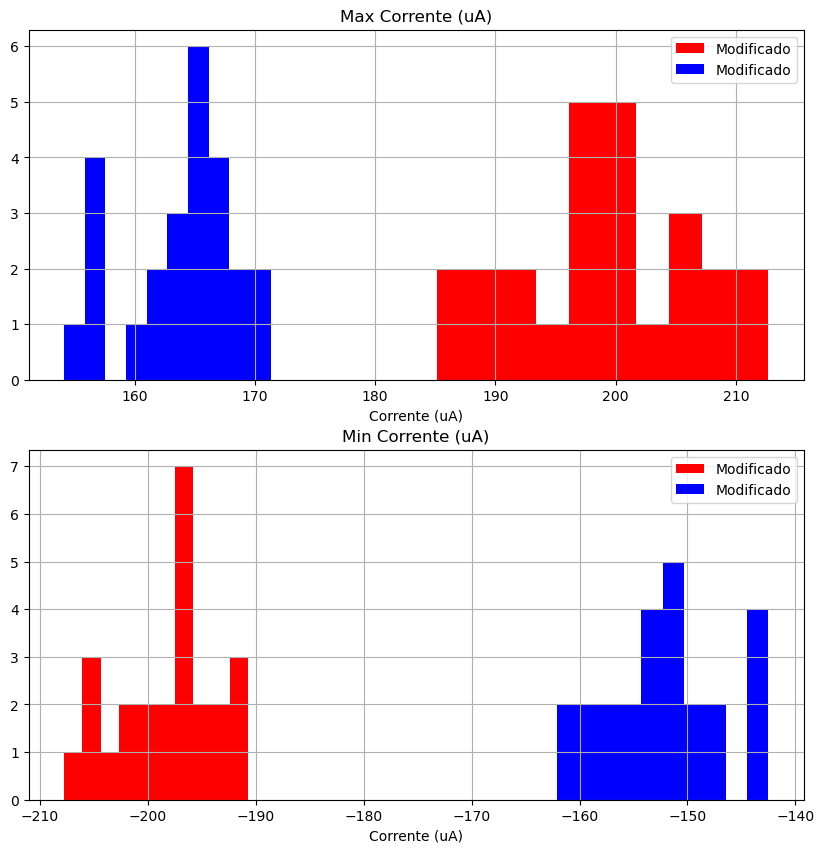

In [23]:
fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, figsize=(10,10))
ax0.hist(max_rhodamine_current_values, color='r', label=label_rodamina)
ax0.hist(max_virgin_current_values, color='b', label=label_rodamina)

ax1.hist(min_rhodamine_current_values, color='r', label=label_rodamina)
ax1.hist(min_virgin_current_values, color='b', label=label_rodamina)

ax0.grid()
ax1.grid()
ax1.legend()
ax0.legend()
ax0.title.set_text('Max ' + corrente)
ax1.title.set_text('Min ' + corrente)
# Set common labels
ax0.set_xlabel(corrente)
ax1.set_xlabel(corrente)

In [24]:
plt.show()

In [25]:
# Realizando os testes estatísticos - 1-passo normalidade
print(st.normaltest(min_rhodamine_current_values))
print(st.normaltest(min_virgin_current_values))
print(st.normaltest(max_rhodamine_current_values))
print(st.normaltest(max_virgin_current_values))

NormaltestResult(statistic=1.274248839790869, pvalue=0.5288108778183118)
NormaltestResult(statistic=0.578155899147929, pvalue=0.748953822495855)
NormaltestResult(statistic=0.5397645350371603, pvalue=0.7634693741897718)
NormaltestResult(statistic=1.4610291149461578, pvalue=0.4816610840044421)


Segundo o teste acima as distribuiçoes não são normais

In [26]:
print(st.mannwhitneyu(min_virgin_current_values, min_rhodamine_current_values))
print(st.mannwhitneyu(max_virgin_current_values, max_rhodamine_current_values))

MannwhitneyuResult(statistic=625.0, pvalue=1.4131023700672182e-09)
MannwhitneyuResult(statistic=0.0, pvalue=1.4092793181631178e-09)


Segundo o teste acima as distribuições tanto para a corrente mínima e máxima são diferentes

## Emstat Readings 

In [27]:
emstat_listfiles = os.listdir(emstast_readings_path)
emstat_listfiles

['E1.csv',
 'E2.csv',
 'E3.csv',
 'E4.csv',
 'E5.csv',
 'R1.csv',
 'R2.csv',
 'R3.csv',
 'R4.csv',
 'R5.csv']

In [28]:
emstat_virgin_df_list = []
emstat_rhodamine_df_list = []


if (len(emstat_listfiles) > 0):
    print("There are readings in this path")
    for i in range(len(emstat_listfiles)):
        file = emstat_listfiles[i]
        print(file)
        
        if ('.csv' in file):
            df = pd.read_csv(emstast_readings_path + file, sep=';')
            df_aux = df.copy()
            
            for j in range(df.shape[0]):
                for k in range(df.shape[1]):
                    
                    v = df.iloc[j,k]
                    if (isinstance(v, str)):
                        v = v.replace(',','.')
                        if ('.' in v):
                            a = float(v)
                            print(a)
                           # if (j % 2 == 0):
                           #    a = a * 1e-5
                           # else:
                           #     a = a * 1e-7
                            df_aux.iloc[j,k] = a
                    else:
                        df_aux.iloc[j,k] = float(a)
                        
            if ('R' in file):
                emstat_rhodamine_df_list.append(df_aux)
            else:
                emstat_virgin_df_list.append(df_aux)
else:
    print("There are no readings in this path")
    
print(f'Virging electrodes: {len(emstat_virgin_df_list)}')
print(f'RCN - Electrodes: {len(emstat_rhodamine_df_list)}')

There are readings in this path
E1.csv
-0.499945
-63.8448
-0.499945
-55.4072
-0.499945
-44.8163
-0.499945
-46.8226
-0.499945
-50.2195
-0.497945
-63.8448
-0.497945
-55.5946
-0.497945
-44.5726
-0.497945
-46.5476
-0.497945
-49.782
-0.495945
-63.7197
-0.495945
-55.1571
-0.495945
-44.4101
-0.495945
-46.3163
-0.495945
-49.4695
-0.493945
-63.1572
-0.493945
-54.4696
-0.493945
-44.1913
-0.493945
-46.0913
-0.493945
-48.9695
-0.491945
-62.4073
-0.491945
-54.1571
-0.491945
-43.9476
-0.491945
-45.8726
-0.491945
-48.782
-0.489945
-62.5322
-0.489945
-53.8446
-0.489945
-43.7663
-0.489945
-45.6601
-0.489945
-48.782
-0.487945
-62.1573
-0.487945
-53.907
-0.487945
-43.6163
-0.487945
-45.4538
-0.487945
-48.7195
-0.485945
-61.7822
-0.485945
-53.6571
-0.485945
-43.4413
-0.485945
-45.2476
-0.485945
-48.032
-0.483945
-61.4072
-0.483945
-53.4071
-0.483945
-43.2413
-0.483945
-45.0788
-0.483945
-47.3101
-0.481945
-61.5323
-0.481945
-53.2821
-0.481945
-43.0413
-0.481945
-44.8663
-0.481945
-47.1476
-0.479945
-61.03

In [29]:
# Joining all pandas files into groups with rhodamine and no-rhodamin
emstat_rhodamine = pd.concat(emstat_rhodamine_df_list, axis=1)
emstat_virgin = pd.concat(emstat_virgin_df_list, axis=1)

In [30]:
emstat_potential_rhodamine = emstat_rhodamine.iloc[:,6]
emstat_currents_rhodamine = emstat_rhodamine.iloc[:,1::2]
emstat_potential_virgin = emstat_virgin.iloc[:,6]
emstat_currents_virgin = emstat_virgin.iloc[:,1::2]

In [31]:
emstat_potential_virgin = emstat_potential_virgin.astype(np.float32)
emstat_potential_rhodamine = emstat_potential_rhodamine.astype(np.float32)
index_min = emstat_potential_rhodamine[emstat_potential_rhodamine == emstat_potential_rhodamine.min()].index
index_min_1 = emstat_potential_virgin[emstat_potential_virgin == emstat_potential_virgin.min()].index
emstat_potential_virgin[index_min_1] = emstat_potential_virgin[index_min_1 - 1]
emstat_potential_rhodamine[index_min] = emstat_potential_rhodamine[index_min - 1]

In [32]:
print(emstat_potential_rhodamine.min())
print(emstat_potential_rhodamine.max())
print(emstat_potential_virgin.min())
print(emstat_potential_virgin.max())

-0.4999450147151947
0.7000730037689209
-0.4999450147151947
0.7000730037689209


In [33]:
emstat_currents_rhodamine = emstat_currents_rhodamine.astype(np.float32)

In [34]:
emstat_currents_virgin = emstat_currents_virgin.astype(np.float32)

In [35]:
emstat_currents_rhodamine.describe()

,A,A.1,A.2,A.3,A.4,A,A.1,A.2,A.3,A.4,...,A,A.1,A.2,A.3,A.4,A,A.1,A.2,A.3,A.4
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,...,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,-4.657566,1.339332,2.439460,0.253715,2.441250,-6.342049,1.411042,2.087328,2.815272,2.741046,...,-4.668476,1.122053,-0.157928,1.480690,0.724806,-4.224267,-4.042113,-2.318592,1.034858,0.559953
std,87.144295,90.044983,91.411667,92.409653,93.278053,89.669914,93.323097,94.361008,94.930550,95.333397,...,87.594360,91.451637,93.454536,94.128197,94.942436,84.071289,89.768730,92.391029,93.616638,94.770432
min,-202.097000,-204.097000,-206.033997,-210.160004,-211.097000,-208.347000,-210.908997,-213.035004,-214.158997,-215.910004,...,-199.908997,-203.783997,-209.722000,-210.410004,-212.722000,-193.908997,-206.658997,-211.347000,-211.222000,-213.660004
25%,-70.594902,-71.157303,-72.469803,-74.376198,-75.157402,-75.720001,-75.344902,-75.969902,-76.907402,-77.657501,...,-71.907402,-73.969803,-76.407402,-76.469902,-77.719902,-64.094803,-72.719902,-73.969803,-73.344902,-74.282402
50%,-19.753401,-11.590800,-9.665780,-11.784600,-9.409520,-22.372200,-10.928300,-9.228270,-7.746990,-7.596990,...,-18.828400,-11.372100,-11.759600,-10.134500,-11.195500,-25.047300,-20.009701,-17.728100,-14.153300,-15.234600
75%,57.460300,63.729099,65.469704,63.407200,65.344803,58.032001,63.591599,65.379097,66.344704,66.219803,...,57.844601,64.157204,62.219601,63.407200,62.657101,55.032001,56.282001,58.532200,61.816601,61.844601
max,188.722000,201.533997,204.533997,205.658997,209.597000,191.533997,209.597000,212.158997,213.972000,215.158997,...,186.908997,200.972000,205.597000,208.783997,209.972000,184.222000,196.783997,204.097000,209.658997,211.222000


In [36]:
emstat_currents_virgin.describe()

,current,current.1,current.2,current.3,current.4,A,A.1,A.2,A.3,A.4,...,A,A.1,A.2,A.3,A.4,A,A.1,A.2,A.3,A.4
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,...,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,-3.056863,-0.286896,1.222426,1.189918,1.040286,-3.014106,1.150420,1.381089,-0.723515,0.629436,...,-2.556730,1.863481,2.214239,0.821928,1.537403,-2.963447,0.754533,1.890087,1.449280,1.719378
std,75.539116,75.787727,75.728951,76.026947,76.436539,75.842392,75.588303,75.735092,75.801033,76.461075,...,78.253242,77.692261,77.687439,77.598434,77.588676,78.045929,77.821899,77.657310,77.968079,78.504959
min,-149.718002,-149.098999,-149.412003,-149.473999,-149.348999,-152.843002,-150.205002,-150.179993,-150.298996,-151.598999,...,-168.095993,-164.298996,-163.436996,-162.011993,-160.923996,-165.087006,-162.373993,-162.192993,-162.005997,-162.386993
25%,-56.210201,-53.091400,-52.160198,-52.585201,-53.103901,-56.304001,-51.566399,-52.041401,-54.407101,-53.147701,...,-56.532101,-51.178902,-50.803902,-51.969501,-51.766399,-56.453999,-51.678902,-51.422699,-51.653900,-52.097698
50%,-23.365999,-19.853399,-17.872200,-17.365900,-16.854900,-22.816000,-18.007500,-16.582399,-16.742399,-15.728400,...,-19.890900,-15.590600,-15.084600,-16.884600,-16.065901,-23.978500,-19.047199,-17.265900,-17.125601,-16.434601
75%,52.991402,54.844601,55.532001,55.844501,55.844501,51.844601,54.969501,55.135201,53.407001,55.157200,...,52.032001,54.719700,55.532001,54.657001,55.469501,52.344601,55.282101,55.282101,55.791500,56.407200
max,154.024002,157.095993,158.595993,159.345993,159.095993,157.220993,160.970993,161.345993,157.783997,160.408997,...,167.220993,170.283997,170.345993,168.220993,167.908997,166.095993,169.283997,169.845993,169.658997,170.158997


Text(0, 0.5, 'Current (uA)')

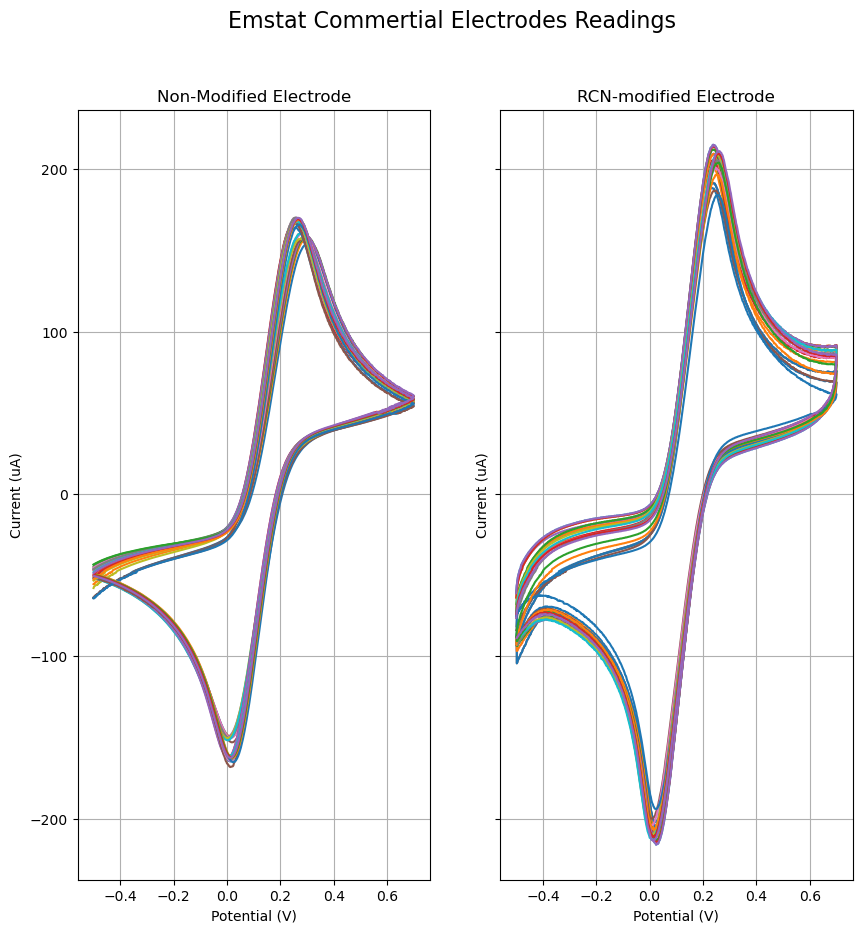

In [37]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(10,10), sharex=True, sharey=True)
fig.suptitle('Emstat Commertial Electrodes Readings', fontsize=16)
for i in range(emstat_currents_virgin.shape[1]):
    ax0.plot(emstat_potential_virgin, emstat_currents_virgin.iloc[:,i].values)
    
for i in range(emstat_currents_rhodamine.shape[1]):
    ax1.plot(emstat_potential_rhodamine, emstat_currents_rhodamine.iloc[:,i].values)

ax0.grid()
ax1.grid()
ax0.title.set_text('Non-Modified Electrode')
ax1.title.set_text('RCN-modified Electrode')
# Set common labels
ax0.set_xlabel('Potential (V)')
ax0.set_ylabel('Current (uA)')
ax1.set_xlabel('Potential (V)')
ax1.set_ylabel('Current (uA)')

In [38]:
plt.show()

In [39]:
emstat_rhodamine_descriptive_df = emstat_currents_rhodamine.describe()
emstat_virgin_descriptive_df = emstat_currents_virgin.describe()

In [40]:
# Pegando os Valores de corrente máximo e Mínimos
emstat_max_rhodamine_current_values = emstat_rhodamine_descriptive_df.iloc[-1,:].values
emstat_min_rhodamine_current_values = emstat_rhodamine_descriptive_df.iloc[3,:].values
emstat_max_virgin_current_values = emstat_virgin_descriptive_df.iloc[-1, :].values
emstat_min_virgin_current_values = emstat_virgin_descriptive_df.iloc[3, :].values

Text(0.5, 0, 'Corrente (uA)')

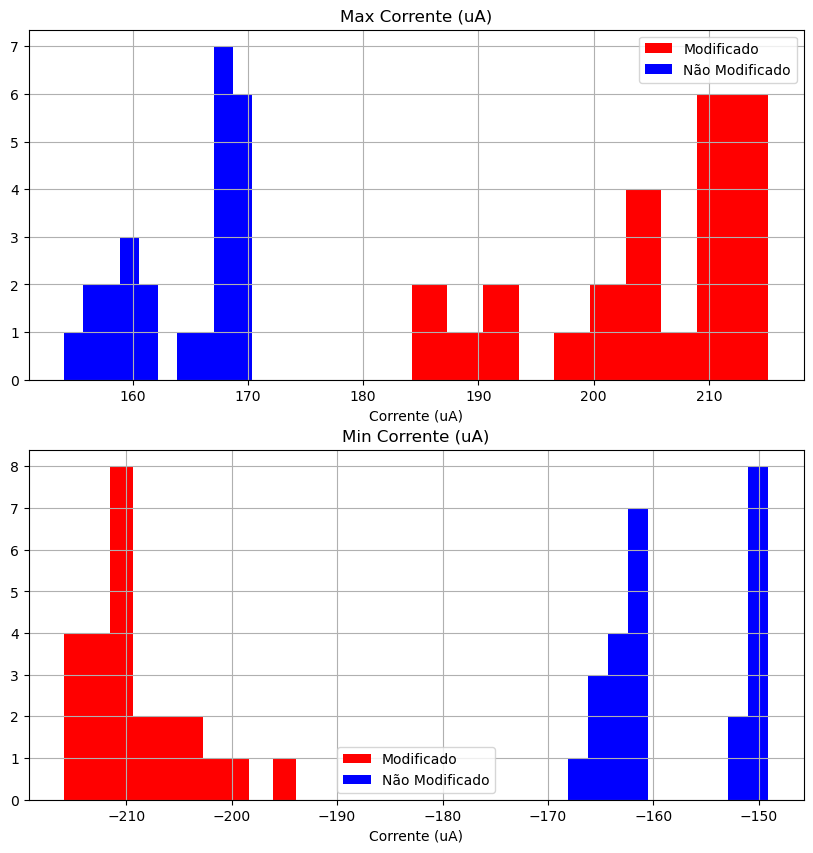

In [41]:
fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, figsize=(10,10))
ax0.hist(emstat_max_rhodamine_current_values, color='r', label=label_rodamina)
ax0.hist(emstat_max_virgin_current_values, color='b', label=label_n_modificado)

ax1.hist(emstat_min_rhodamine_current_values, color='r', label=label_rodamina)
ax1.hist(emstat_min_virgin_current_values, color='b', label=label_n_modificado)

ax0.grid()
ax1.grid()
ax1.legend()
ax0.legend()
ax0.title.set_text('Max ' + corrente)
ax1.title.set_text('Min ' + corrente)
# Set common labels
ax0.set_xlabel(corrente)
ax1.set_xlabel(corrente)

In [42]:
# Realizando os testes estatísticos - 1-passo normalidade
print(st.normaltest(emstat_min_rhodamine_current_values))
print(st.normaltest(emstat_min_virgin_current_values))
print(st.normaltest(emstat_max_rhodamine_current_values))
print(st.normaltest(emstat_max_virgin_current_values))

NormaltestResult(statistic=9.264463318123816, pvalue=0.009733014078559846)
NormaltestResult(statistic=20.157736812201325, pvalue=4.195686857221149e-05)
NormaltestResult(statistic=3.8354072871405758, pvalue=0.14694401081432307)
NormaltestResult(statistic=6.845965329701795, pvalue=0.032615010074226486)


In [43]:
print(st.mannwhitneyu(emstat_min_virgin_current_values, emstat_min_rhodamine_current_values))
print(st.mannwhitneyu(emstat_max_virgin_current_values, emstat_max_rhodamine_current_values))

MannwhitneyuResult(statistic=625.0, pvalue=1.4092793181631178e-09)
MannwhitneyuResult(statistic=0.0, pvalue=1.4029281304677557e-09)


# Comparação entre os dispositivos

In [44]:
print(len(emstat_potential_virgin))
print(len(emstat_currents_virgin))
print(len(potential_virgin))
print(len(currents_virgin))

1201
1201
1115
1115


Text(0, 0.5, 'Corrente (uA)')

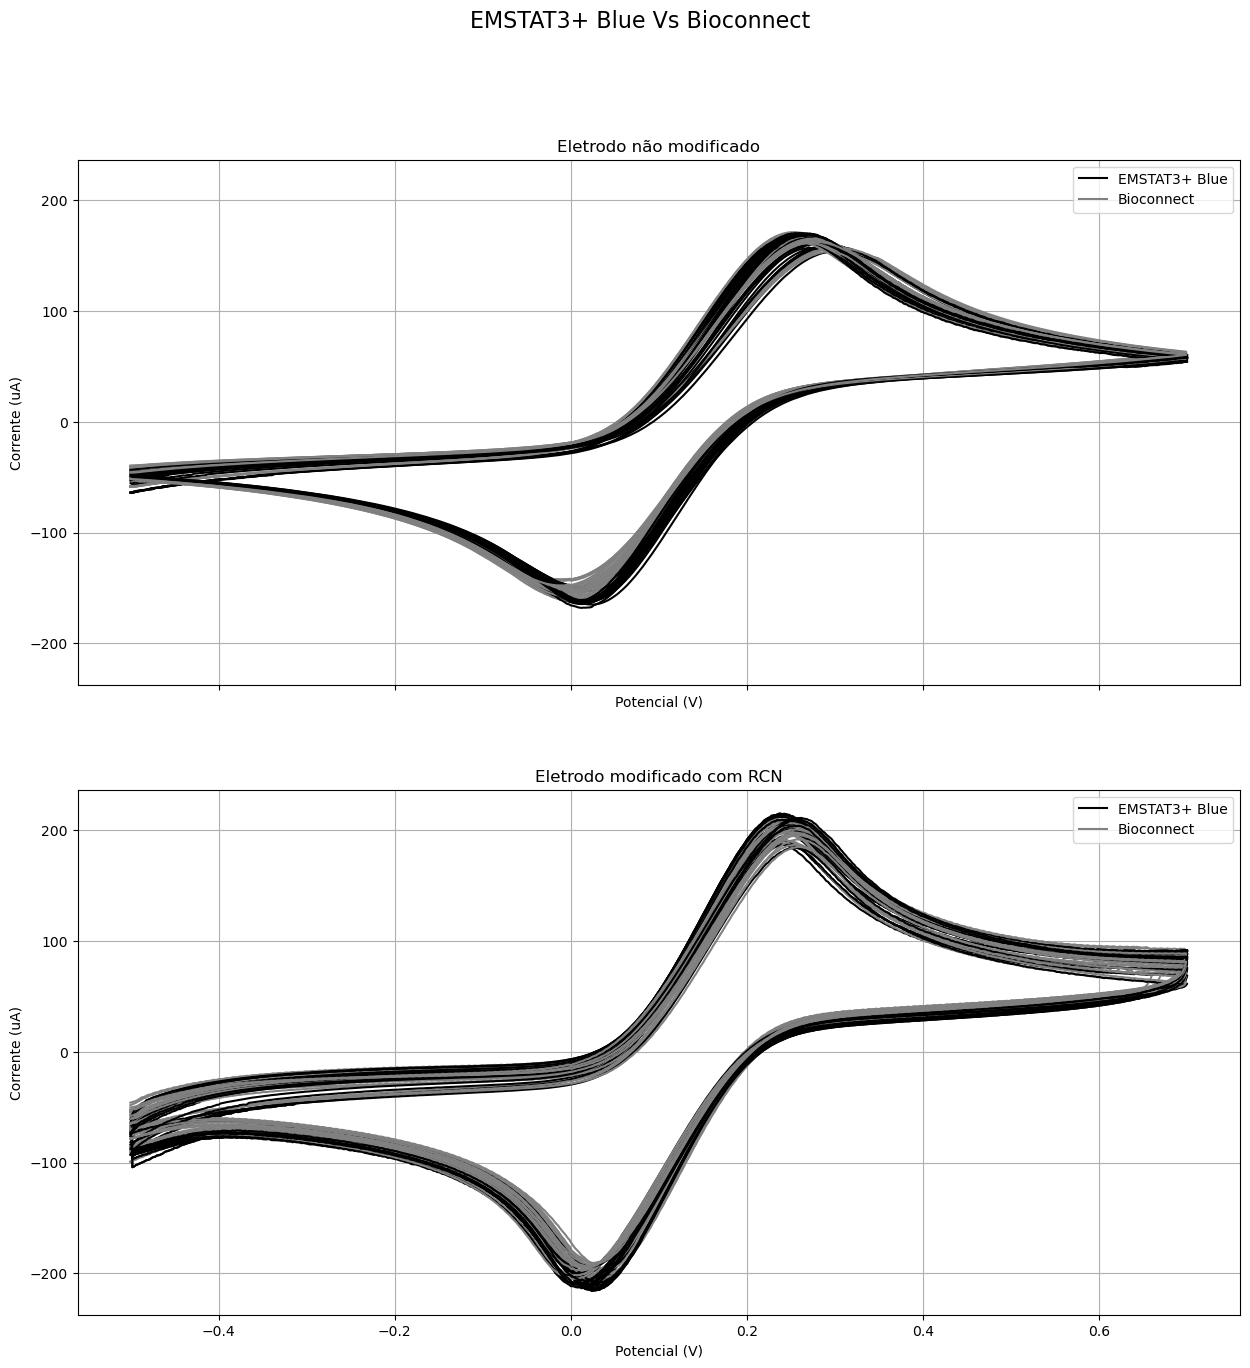

In [45]:
fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, figsize=(15,15), sharex=True, sharey=True)
fig.suptitle('EMSTAT3+ Blue Vs Bioconnect', fontsize=16)
for i in range(emstat_currents_virgin.shape[1]):
    if i == 0:
        ax0.plot(emstat_potential_virgin, emstat_currents_virgin.iloc[:,i].values, color='black', label='EMSTAT3+ Blue')
        ax0.plot(potential_virgin, currents_virgin.iloc[:,i].values * 1000000, color='gray',  label='Bioconnect')
    else:
        ax0.plot(emstat_potential_virgin, emstat_currents_virgin.iloc[:,i].values, color='black')
        ax0.plot(potential_virgin, currents_virgin.iloc[:,i].values * 1000000, color='gray')  
    
for i in range(emstat_currents_rhodamine.shape[1]):
    if i == 0:
        ax1.plot(emstat_potential_rhodamine, emstat_currents_rhodamine.iloc[:,i].values, color='black', label='EMSTAT3+ Blue')
        ax1.plot(potential_rhodamine, currents_rhodamine.iloc[:,i].values * 1000000, color='gray', label='Bioconnect')
    else:
        ax1.plot(emstat_potential_rhodamine, emstat_currents_rhodamine.iloc[:,i].values, color='black')
        ax1.plot(potential_rhodamine, currents_rhodamine.iloc[:,i].values * 1000000, color='gray')  

ax0.grid(True)
ax1.grid(True)
ax1.legend()
ax0.legend()
ax0.title.set_text('Eletrodo não modificado')
ax1.title.set_text('Eletrodo modificado com RCN')

# Set common labels
ax0.set_xlabel('Potencial (V)')
ax0.set_ylabel(corrente)
ax1.set_xlabel('Potencial (V)')
ax1.set_ylabel(corrente)


Text(0, 0.5, 'N de Observações')

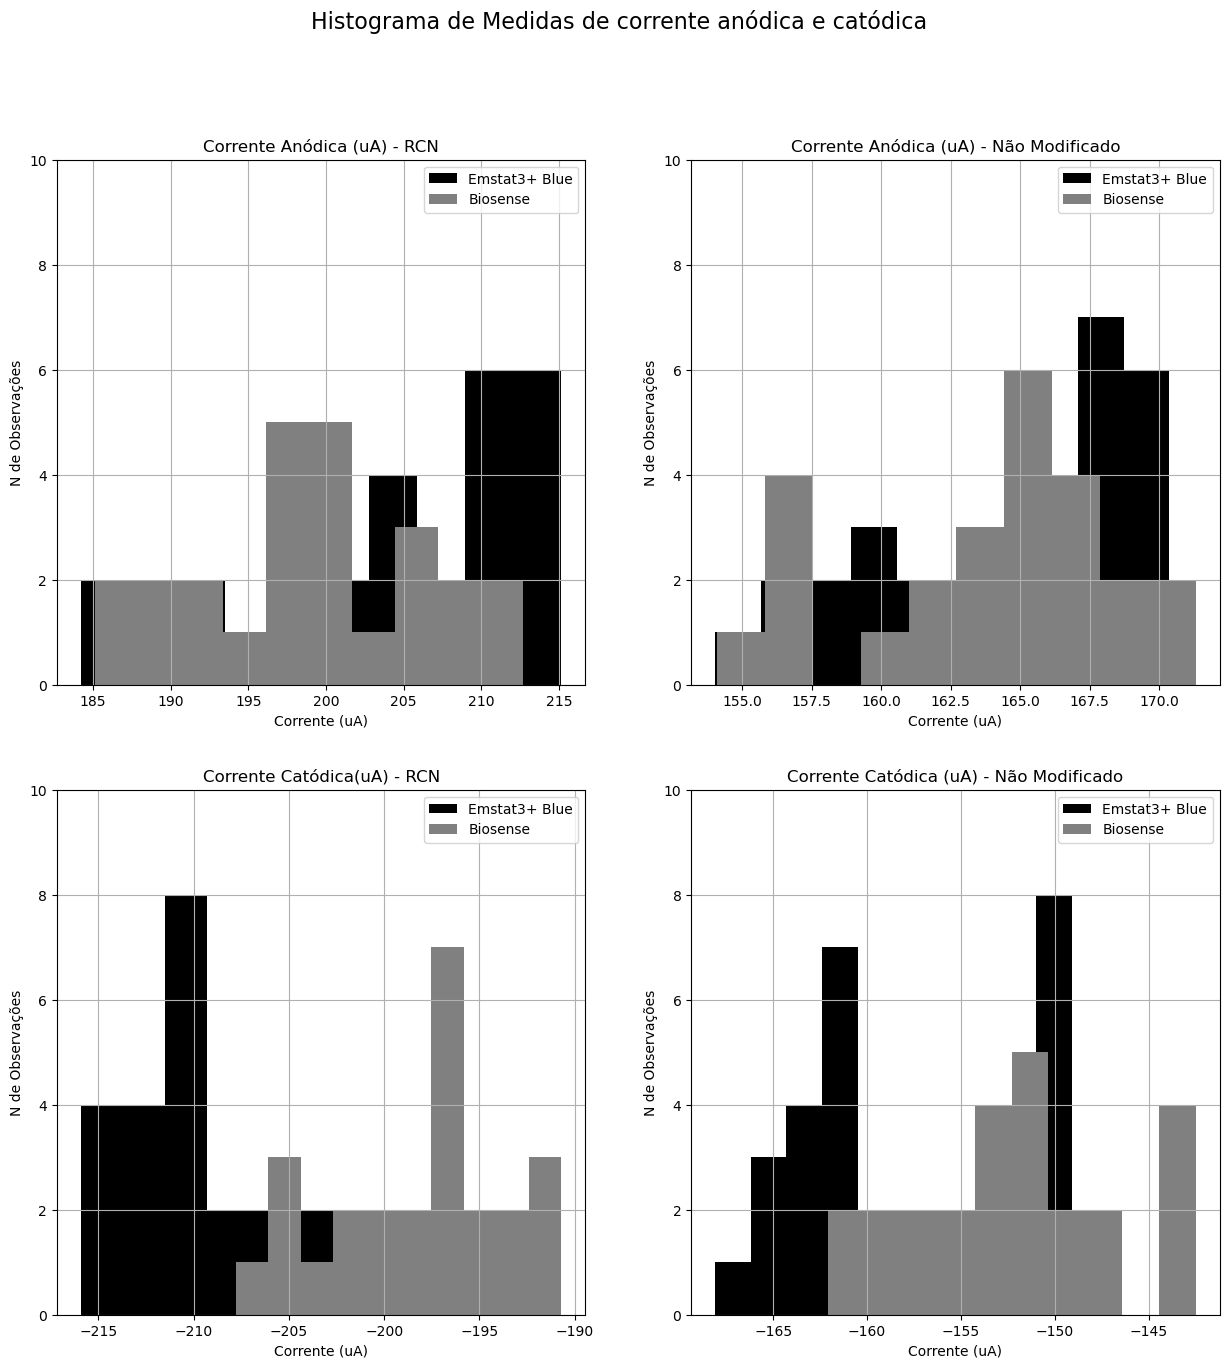

In [56]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=2, figsize=(15,15))
fig.suptitle('Histograma de Medidas de corrente anódica e catódica', fontsize=16)
ax0[0].hist(emstat_max_rhodamine_current_values, color='black', label='Emstat3+ Blue')
ax0[0].hist(max_rhodamine_current_values, color='gray', label='Biosense')
ax0[1].hist(emstat_max_virgin_current_values, color='black', label='Emstat3+ Blue')
ax0[1].hist(max_virgin_current_values, color='gray', label='Biosense')

ax1[0].hist(emstat_min_rhodamine_current_values, color='black', label='Emstat3+ Blue')
ax1[0].hist(min_rhodamine_current_values, color='gray', label='Biosense')
ax1[1].hist(emstat_min_virgin_current_values, color='black', label='Emstat3+ Blue')
ax1[1].hist(min_virgin_current_values, color='gray', label='Biosense')

ax0[0].grid()
ax1[0].grid()
ax1[0].legend()
ax0[0].legend()
ax0[0].title.set_text('Corrente Anódica (uA) - RCN')
ax1[0].title.set_text('Corrente Catódica(uA) - RCN')
# Set common labels
ax0[0].set_xlabel(corrente)
ax1[0].set_xlabel(corrente)
ax0[0].set_ylabel('N de Observações')
ax1[0].set_ylabel('N de Observações')
ax1[0].set_ylim(0,10)
ax1[1].set_ylim(0,10)

ax0[0].set_ylim(0,10)
ax0[1].set_ylim(0,10)

ax0[1].grid()
ax1[1].grid()
ax1[1].legend()
ax0[1].legend()
ax0[1].title.set_text('Corrente Anódica (uA) - Não Modificado')
ax1[1].title.set_text('Corrente Catódica (uA) - Não Modificado')
# Set common labels
ax0[1].set_xlabel(corrente)
ax1[1].set_xlabel(corrente)
ax0[1].set_ylabel('N de Observações')
ax1[1].set_ylabel('N de Observações')

In [126]:
print(st.shapiro(emstat_min_virgin_current_values))
print(st.shapiro(min_virgin_current_values))
print(st.shapiro(emstat_min_rhodamine_current_values))
print(st.shapiro(min_rhodamine_current_values))
print(st.shapiro(emstat_max_virgin_current_values))
print(st.shapiro(max_virgin_current_values))
print(st.shapiro(emstat_max_rhodamine_current_values))
print(st.shapiro(max_rhodamine_current_values))

ShapiroResult(statistic=0.8018723726272583, pvalue=0.0002443252014927566)
ShapiroResult(statistic=0.9576109647750854, pvalue=0.36894986033439636)
ShapiroResult(statistic=0.9007881879806519, pvalue=0.019086508080363274)
ShapiroResult(statistic=0.9622170925140381, pvalue=0.46037888526916504)
ShapiroResult(statistic=0.8759714961051941, pvalue=0.00571322999894619)
ShapiroResult(statistic=0.9495688676834106, pvalue=0.24517256021499634)
ShapiroResult(statistic=0.8776710033416748, pvalue=0.00618912186473608)
ShapiroResult(statistic=0.9768425226211548, pvalue=0.8162740468978882)


In [127]:
print(st.f_oneway(emstat_min_virgin_current_values, min_virgin_current_values))
print(st.f_oneway(emstat_min_rhodamine_current_values, min_rhodamine_current_values))
print(st.f_oneway(emstat_max_virgin_current_values, max_virgin_current_values))
print(st.f_oneway(emstat_max_rhodamine_current_values, max_rhodamine_current_values))

F_onewayResult(statistic=10.604331516607747, pvalue=0.002073229721205832)
F_onewayResult(statistic=58.38748243692373, pvalue=7.706912068076128e-10)
F_onewayResult(statistic=0.18433345734074244, pvalue=0.6695963496705564)
F_onewayResult(statistic=5.056675268490817, pvalue=0.029157909320926878)


In [128]:
print(st.mannwhitneyu(emstat_min_virgin_current_values, min_virgin_current_values))
print(st.mannwhitneyu(emstat_min_rhodamine_current_values, min_rhodamine_current_values))
print(st.mannwhitneyu(emstat_max_virgin_current_values, max_virgin_current_values))
print(st.mannwhitneyu(emstat_max_rhodamine_current_values, max_rhodamine_current_values))

MannwhitneyuResult(statistic=175.0, pvalue=0.007854660607751161)
MannwhitneyuResult(statistic=47.0, pvalue=2.7111204308193995e-07)
MannwhitneyuResult(statistic=353.0, pvalue=0.43760465217112177)
MannwhitneyuResult(statistic=438.0, pvalue=0.015273749466736566)


In [124]:
print("Means, std")
print(emstat_min_virgin_current_values.mean(), emstat_min_virgin_current_values.std())
print(min_virgin_current_values.mean(), min_virgin_current_values.std())
print(emstat_min_rhodamine_current_values.mean(), emstat_min_rhodamine_current_values.std())
print(min_rhodamine_current_values.mean(), min_rhodamine_current_values.std())
print(emstat_max_rhodamine_current_values.mean(), emstat_max_rhodamine_current_values.std())
print(max_rhodamine_current_values.mean(),max_rhodamine_current_values.std() )
print(emstat_max_virgin_current_values.mean(), emstat_max_virgin_current_values.std())
print(max_virgin_current_values.mean(), max_virgin_current_values.std())

Means, std
-157.97407775878906 6.5067353917326605
-152.276 5.5807727063552806
-209.2619598388672 5.159619421901561
-198.408 4.669382828597373
204.52423828125 9.189814574576213
199.164 7.205269183035426
164.43331481933595 5.111661548013358
163.83599999999998 4.508204077013374
